##Localisation des données

In [ ]:
url_file_abbe = 'https://docs.google.com/spreadsheets/d/12zAndDlNEDTDDCh-lRN5IUEMPxswVRoJdHuYoII8eiM/edit#gid=0'
url_file_narb = 'https://docs.google.com/spreadsheets/d/1CqQiiSAy7rskIfFiyUDETPuLwn8ZJQt4k1jhG7Ms44k/edit#gid=0'
gama_gsheet   = url_file_narb
json_key = "/content/drive/My Drive/EEW/fr-rde-veri-plateformecalcul-94e78265fc9f.json"
json_bucket = "/content/drive/My Drive/EEW/gbl-ist-veri-waternamics-b18b5f179b6a.json"
lerne_filename    = "lerne/2020-03.csv"
site = "narbonne" # Available plants : "SaintMalo", "Abbeville"
eveler_filename = "eveler/2020-03.csv"
data_direct   = "/content/drive/My Drive/PROJETS/EE-Waternamics/Data/"

## Lecture des données GAMA

In [ ]:
import sys
sys.path.append("/content/drive/My Drive/EEW")
import imp
import Function_sous_comptage_func 
imp.reload(Function_sous_comptage_func)
from Function_sous_comptage_func import Read_GAMA_file_Abbeville


df_gama = Read_GAMA_file_Abbeville(gama_gsheet, json_key)
# Le df contient les colonnes suivantes:
# 'Tag_Veolinkcare'
# 'Puissance (kW)'
# 'Puissance installée (kW) Schéma Elect.'
# 'Facteur utilisation'

#df_gama.to_pickle('Data/correspondance_labels/gama_narbonne.pkl')

## Lecture échantillon de données Lerne

In [ ]:
## import google storage password key
import os
import imp

imp.reload(Function_sous_comptage_func)
from Function_sous_comptage_func import Read_Lerne_file

target_file = "/content/drive/My Drive/EEW/Data/" + lerne_filename
df_lerne = Read_Lerne_file(site,target_file, lerne_filename, json_bucket, ",")


In [ ]:
# suppression des labels lerne de gama qui ne sont pas dans le Lerne

label_dans_lerne = list(df_lerne.columns)
df_gama['Lerne'] = df_gama.index

df_gama_filtre = df_gama.loc[df_gama['Lerne'].isin(label_dans_lerne)]

In [ ]:
d_lerne_vk_abb = {'AGITATEUR_001':'P_TRTBIO_AGIT_5',
'BROSSE_101_CHENAL_1':'P_TRTBIO_BR_AER_1',
'BROSSE_102_CHENAL_1':'P_TRTBIO_BR_AER_2',
'BROSSE_103_CHENAL_1':'P_TRTBIO_BR_AER_3',
'BROSSE_201_CHENAL_2':'P_TRTBIO_BR_AER_4',
'BROSSE_202_CHENAL_2':'P_TRTBIO_BR_AER_5',
'BROSSE_203_CHENAL_2':'P_TRTBIO_BR_AER_6',
'AGITATEUR_104':'P_TRTBIO_AGIT_1',
'AGITATEUR_105':'P_TRTBIO_AGIT_2',
'AGITATEUR_204':'P_TRTBIO_AGIT_3',
'AGITATEUR_205':'P_TRTBIO_AGIT_4',
'P1_RECIRCULATION_C1':'P_TRTBIO_RECIRC_1',
'P2_RECIRCULATION_C1':'P_TRTBIO_RECIRC_2',
'P1_RECIRCULATION_C2':'P_TRTBIO_RECIRC_3',
'P2_RECIRCULATION_C2':'P_TRTBIO_RECIRC_4',
'MOTEUR_BOL_CENTRI_1':'P_A1_BOL_CTR_1',
'MOTEUR_BOL_CENTRI_2':'P_A1_BOL_CTR_2'}



## Equipements communs au Lerne et Gama

In [ ]:

import imp

imp.reload(Function_sous_comptage_func)
from Function_sous_comptage_func import Check_Common_Attributes_Lerne_Gama

liste_equip_in_lerne = Check_Common_Attributes_Lerne_Gama(df_lerne, df_gama)

Certains équipements dans Gama ne sont pas dans le Lerne
{'M_VENTILATEUR_1_DESODO', 'M_VENTILATEUR_2_BIOLIX', 'M_AGITATEUR_2_OXYDATION_FILE_2', 'M_TURBINE_OXYCLONE_1', 'M_POMPE_SOUDE_2', 'M_VENTILATEUR_3_LOCAL_SURPRES', 'M_POMPE_ACIDE_1', 'M_AGITATEUR_1_ANOXIE_FILE_1', 'M_EXTRACTION_BIOLIX_1', 'M_POMPE_CHLORURE_FERRIQUE_FIL2', 'M_VENTILATEUR__2_LOCAL_1_ETAGE', 'M_POMPE_SOUDE_1', 'M_POMPE_CHLORURE_FERRIQUE_FIL1', 'M_VENTILATEUR_2_DESODO', 'M_BOL_CENTRIFUGEUSE_1', 'M_AGITATEUR_2_ANAEROBIE_FILE_2', 'M_COMPACTEUR_MARCHE_ARRIERE', 'M_POMPE_2_BOUE_EN_EXES', 'M_POMPE_EAU_INDUSTRIEL_1', 'M_RECIRCU_DESODO_FILE_1_TOUR_1', 'M_POMPE_JAVEL_2', 'M_TURBINE_OXYCLONE_2', 'M_POMPE_POLYMERE_2', 'M_POMPE_POLYMERE_3', 'M_POMPE_1_BOUE_EN_EXES', 'M_RACLEUR_SURFACE_2', 'M_VENTILATEUR_1_LOCAL_SURPRES', 'M_VIS_CENTRIFUGEUSE_1', 'M_POMPE_SOUDE_3', 'M_AGITATEUR_1_ANAEROBIE_FILE_1', 'M_POMPE_ACIDE_3', 'M_POMPE_JAVEL_3', 'M_POMPE_A_SABLE', 'M_VENTILATEUR1_CENTRIFUGEUSE1', 'M_VENTILATEUR_1_LOCAL_1_ETAGE', 'M_SURPRES

## Calcul des temps de fonctionnement des équipements

In [ ]:
from Function_sous_comptage_func import Compute_Equi_TDM_Lerne
Periode = '24H' # Fréquence d'aggrégation des résultats

# Temps de fonctionnement en heure
Equip_Work_Time = Compute_Equi_TDM_Lerne(df_lerne, liste_equip_in_lerne, periode = Periode)


## Calcul des Consommations électriques

In [ ]:
# Liste des libellé équipements communs à Lerne et données Gamma
from Function_sous_comptage_func import Compute_Equipements_Conso
Conso_Estimees = Compute_Equipements_Conso(Equip_Work_Time, df_gama)


## Comparaison avec les données Eveler

In [ ]:
# Lecture des données Eveler


import imp

imp.reload(Function_sous_comptage_func)
from Function_sous_comptage_func import Read_Eveler_file

target_file = "/content/drive/My Drive/EEW/Data/" + eveler_filename
df_eveler = Read_Eveler_file(site, target_file, eveler_filename , json_bucket)


#Conso_Eveler =  ssf.Compute_Eveler_Conso(df_eveler, '24H')
#Conso_Estimees_Total  = Conso_Estimees.sum(axis=1)
#Conso_Estimees_Total.name = 'Conso_Estimee'
#Conso_Eveler.name = 'Conso_Eveler'
##Daily_Conso_Concat = pd.merge(Conso_Estimees_Total, Conso_Eveler, how='left', left_index = True, right_index = True)

#Daily_Conso_Concat.dropna(inplace=True)


In [ ]:
imp.reload(Function_sous_comptage_func)
from Function_sous_comptage_func import Compute_Eveler_Conso

Conso_Eveler =  Compute_Eveler_Conso(df_eveler, '24H')

In [ ]:
Conso_Eveler

,P_ACT_KW,P_REACT_KVAR_POSITIVE
HORODATAGE,,
2020-02-29 00:00:00+00:00,4852.869565,NaN
2020-03-01 00:00:00+00:00,5007.000000,NaN
2020-03-02 00:00:00+00:00,5516.666667,NaN
2020-03-03 00:00:00+00:00,5293.166667,NaN
2020-03-04 00:00:00+00:00,4842.500000,NaN
2020-03-05 00:00:00+00:00,5127.666667,NaN
2020-03-06 00:00:00+00:00,5160.166667,NaN
2020-03-07 00:00:00+00:00,4549.833333,NaN
2020-03-08 00:00:00+00:00,4642.500000,NaN


## Calcul de l'erreur sur la consommation totale sur la période

In [ ]:
Conso_Eveler     = Daily_Conso_Concat['Conso_Eveler'].sum()
Conso_Estimateur = Daily_Conso_Concat['Conso_Estimee'].sum()
Ecart = (Conso_Eveler - Conso_Estimateur )/Conso_Eveler*100

print(Conso_Eveler, Conso_Estimateur, Ecart)


520233.54761904763 324402.30523555545 37.64294772602667


In [ ]:
Conso_Eveler

520233.54761904763

Text(0.5, 1.0, 'Abbeville: Consommation électrique journalière Totale')

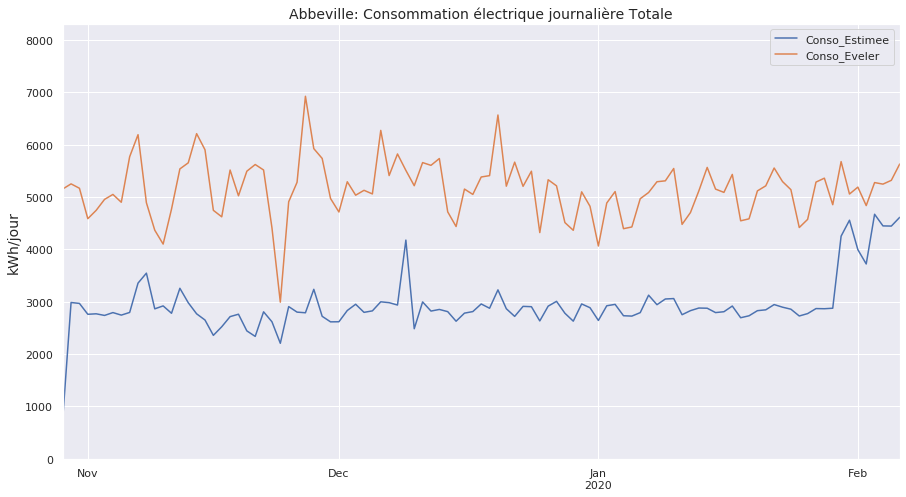

In [ ]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 8)})
max_val = Daily_Conso_Concat.max().max()
y_max = int(1.2*max_val)

ax_1 = Daily_Conso_Concat.plot(ylim=[0, y_max])
ax_1.set_ylabel('kWh/jour', fontsize=14)
ax_1.set_title('Abbeville: Consommation électrique journalière Totale', fontsize=14)

# ax_2 = Daily_conso.plot.area()
# ax_2.set_ylabel('kWh/jour', fontsize=14)






